<a href="https://colab.research.google.com/github/sumaiyababar/Agentless-Security-Approach-For-Iot-Devices/blob/main/FeautureSelectionFYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/ICUDatasetProcessed .

In [4]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['patientMonitoring.csv',
 'attack.csv',
 'Attack.csv',
 'environmentMonitoring.csv']

In [3]:
import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [66]:
df4 = pd.read_csv('/content/drive/MyDrive/ICUDatasetProcessed/attack.csv')
df4.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto', 'ip.ttl',
       'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack',
       'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.synack',
       'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin',
       'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg',
       'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size', 'tcp.window_size_value',
       'tcp.checksum', 'mqtt.clientid', 'mqtt.clientid_len',
       'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.passwd',
       'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype',
       'mqtt.qos', 'mqtt.retain', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mqtt.willmsg_len', 'label'],
      dtype='object')

In [64]:
#data cleaning
df4 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df4 = df4.append(df, ignore_index=True)
  print(f'df1.shape: {df4.shape}')

---- Reading patientMonitoring.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (76810, 52)
empty_cols: 0
[]
df1.shape: (430354, 53)
---- Reading attack.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (164850, 51)
empty_cols: 0
[]
df1.shape: (595204, 53)
---- Reading Attack.csv ----
df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (675330, 53)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (707088, 53)


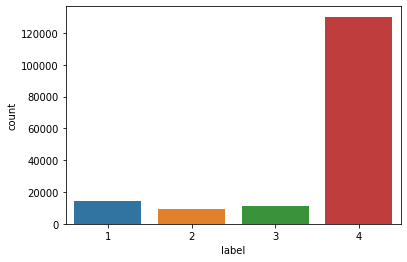

In [67]:
#Data Visualization
import seaborn as s
s.countplot(x='label',data=df4)

In [68]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags']

In [71]:
df4.drop(labels=feats, axis=1, inplace=True)
df4.shape

(164850, 41)

In [90]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [ ]:
df4 = df4[fs2]
df4.shape

In [75]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#df1['tcp.flags']= label_encoder.fit_transform(df1['tcp.flags'])
#df1['tcp.checksum']= label_encoder.fit_transform(df1['tcp.checksum'])
df4['mqtt.hdrflags']= label_encoder.fit_transform(df4['mqtt.hdrflags'])

In [89]:
X_train, X_test, y_train, y_test = train_test_split( df4.drop(labels=['label'], axis=1), df4['label'], 
                                                                            test_size=0.3, random_state=100)

KeyError: ignored

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)

embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [ True False False  True  True False  True  True  True False]
6 selected features
embeded_LR_features:  ['frame.time_delta', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain']


In [83]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']

In [84]:
## DATA NORMALIZATION (LABELS)

raw_data = df4
raw_data = raw_data.sort_values('label')
raw_data = raw_data.reset_index()


index0 = raw_data[raw_data['label'] == 1].index.values
index1 = raw_data[raw_data['label'] == 2].index.values
index2 = raw_data[raw_data['label'] == 3].index.values
index3 = raw_data[raw_data['label'] == 4].index.values



df_index0 = raw_data.iloc[int(min(index0)):int(max(index0)+1)]
df_index1 = raw_data.iloc[int(min(index1)):int(max(index1)+1)]
df_index2 = raw_data.iloc[int(min(index2)):int(max(index2)+1)]
df_index3 = raw_data.iloc[int(min(index3)):int(max(index3)+1)]




df_index0 = df_index0.append([df_index0]*20, ignore_index = True)
df_index1 = df_index1.append([df_index1]*25, ignore_index = True)
df_index2 = df_index2.append([df_index2]*25, ignore_index = True)
df_index3 = df_index3.append([df_index3], ignore_index = True)


frames = [raw_data,  df_index0, df_index1, df_index2, df_index3]

final_data = pd.concat(frames)
final_data.drop('index', inplace = True, axis = 1)
final_data = final_data.sample(frac = 1)
data = final_data.iloc[:,:-1]
labels = final_data.iloc[:,-1:]

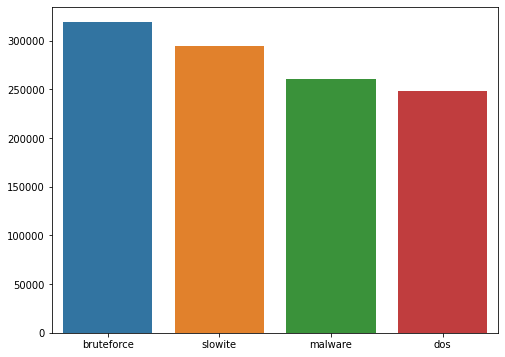

In [36]:
type_attack = ['bruteforce','slowite','malware','dos']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
s.barplot(x = type_attack, y = counts)

In [86]:
def visualisePlots(X,Y, rows, columns):
    class_dicts = {
        1: 'bruteforce',
        2: 'slowite',
        3: 'malware',
        4: 'dos'
    }

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [94]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)


print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [98]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accuracy','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction,average='micro')*100,
                recall_score(y_test,  gnb_prediction,average='micro')*100,
                f1_score(y_test,  gnb_prediction,average='micro')*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction,average='weighted')*100,
                recall_score(y_test, KNN_prediction,average='weighted')*100,
                f1_score(y_test, KNN_prediction,average='weighted')*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction,average='micro')*100,
                recall_score(y_test,  RF_prediction,average='micro')*100,
                f1_score(y_test,  RF_prediction,average='micro')*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction,average='micro')*100,
                recall_score(y_test,  AB_prediction,average='micro')*100,
                f1_score(y_test,  AB_prediction,average='micro')*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction,average='micro')*100,
                recall_score(y_test,  LogR_prediction,average='micro')*100,
                f1_score(y_test,  LogR_prediction,average='micro')*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction,average='micro')*100,
                recall_score(y_test,  DT_prediction,average='micro')*100,
                f1_score(y_test,  DT_prediction,average='micro')*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'), ('NB ', 64.0481245576787, 64.0481245576787, 64.0481245576787, 64.0481245576787), ('KNN ', 93.5456475583864, 93.4598051468939, 93.5456475583864, 93.44512692864588), ('RF ', 93.5517136791022, 93.5517136791022, 93.5517136791022, 93.5517136791022), ('AB ', 36.31988676574664, 36.31988676574664, 36.31988676574664, 36.319886765746645), ('LogR ', 85.08947528055808, 85.08947528055808, 85.08947528055808, 85.08947528055808), ('DT ', 93.49711859265999, 93.49711859265999, 93.49711859265999, 93.49711859266)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accuracy  Precision     Recall   F1-Score
2         NB   64.048125  64.048125  64.048125  64.048125
3        KNN   93.545648  93.

In [99]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix AB_prediction')
print(confusion_matrix(y_test,AB_prediction))
print('Confusion Matrix LogR_prediction')
print(confusion_matrix(y_test,LogR_prediction))
print('Confusion Matrix DT_prediction')
print(confusion_matrix(y_test,DT_prediction))

Confusion Matrix gnb_prediction
[[  706  3127     6   440]
 [    2  2325     3   372]
 [   85  1881   531   831]
 [   27 11005     1 28113]]
Confusion Matrix KNN_prediction
[[ 3444    32    76   727]
 [   30  2086    85   501]
 [  439   167  2461   261]
 [  423   332   119 38272]]
Confusion Matrix RF_prediction
[[ 3500    63    61   655]
 [   54  2114    59   475]
 [  561   172  2284   311]
 [  421   272    85 38368]]
Confusion Matrix AB_prediction
[[ 3194    60   422   603]
 [  145  1422   182   953]
 [  676   279  1787   586]
 [  526     7 27054 11559]]
Confusion Matrix LogR_prediction
[[ 1267     1    24  2987]
 [  585   622     3  1492]
 [  538   246  1065  1479]
 [   11     4     4 39127]]
Confusion Matrix DT_prediction
[[ 3539   111    41   588]
 [   43  2095    87   477]
 [  526   198  2315   289]
 [  461   299    96 38290]]
